In [69]:
#Introduction to ESG
"""
ESG stands for Environmental, Social, and Governance:
- Environmental: Focuses on a company’s impact on the planet (e.g., emissions, waste).
- Social: Includes employee treatment, diversity, and human rights.
- Governance: Refers to how a company is run (e.g., board structure, audits, ethics).

This project aims to analyze ESG scores of S&P 500 companies and categorize them into risk levels.
"""

'\nESG stands for Environmental, Social, and Governance:\n- Environmental: Focuses on a company’s impact on the planet (e.g., emissions, waste).\n- Social: Includes employee treatment, diversity, and human rights.\n- Governance: Refers to how a company is run (e.g., board structure, audits, ethics).\n\nThis project aims to analyze ESG scores of S&P 500 companies and categorize them into risk levels.\n'

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")



In [71]:
# Loading the dataset
esg_df = pd.read_csv('ESG_Sample_Data.csv')


In [73]:
# Display basic information
print('\nDataset Info:')
esg_df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  20 non-null     object
 1   E_Score  20 non-null     int64 
 2   S_Score  20 non-null     int64 
 3   G_Score  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [75]:
# Displaying first few rows
print('\nDataset Preview:')
esg_df.head()



Dataset Preview:


,Company,E_Score,S_Score,G_Score
0,Company1,71,77,58
1,Company2,34,41,37
2,Company3,91,68,23
3,Company4,80,78,79
4,Company5,40,61,33


In [77]:
# Checking for missing values
print('\nMissing Values:')
esg_df.isna().sum()


Missing Values:


Company    0
E_Score    0
S_Score    0
G_Score    0
dtype: int64

In [79]:
# Descriptive statistics
print('\nDescriptive Statistics:')
esg_df.describe()


Descriptive Statistics:


,E_Score,S_Score,G_Score
count,20.000000,20.000000,20.000000
mean,58.950000,66.150000,51.000000
std,25.992863,21.943168,25.216953
min,21.000000,22.000000,21.000000
25%,40.000000,56.000000,26.500000
50%,54.500000,72.000000,54.500000
75%,80.750000,81.000000,69.750000
max,95.000000,99.000000,97.000000


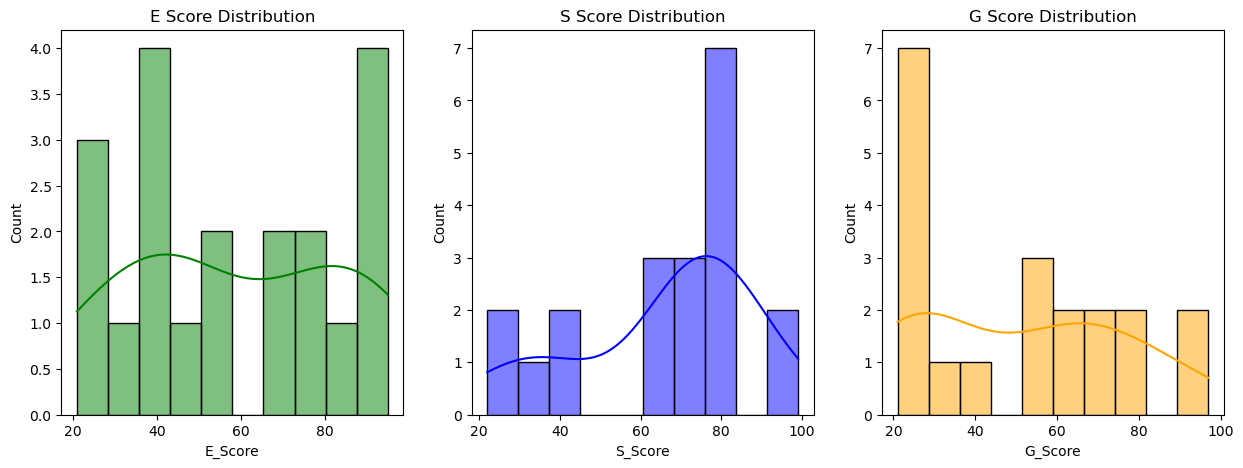

In [53]:
# Distribution of each ESG score
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(esg_df['E_Score'], bins=10, kde=True, color='green')
plt.title('E Score Distribution')
plt.subplot(1, 3, 2)
sns.histplot(esg_df['S_Score'], bins=10, kde=True, color='blue')
plt.title('S Score Distribution')
plt.subplot(1, 3, 3)
sns.histplot(esg_df['G_Score'], bins=10, kde=True, color='orange')
plt.title('G Score Distribution')
plt.show()

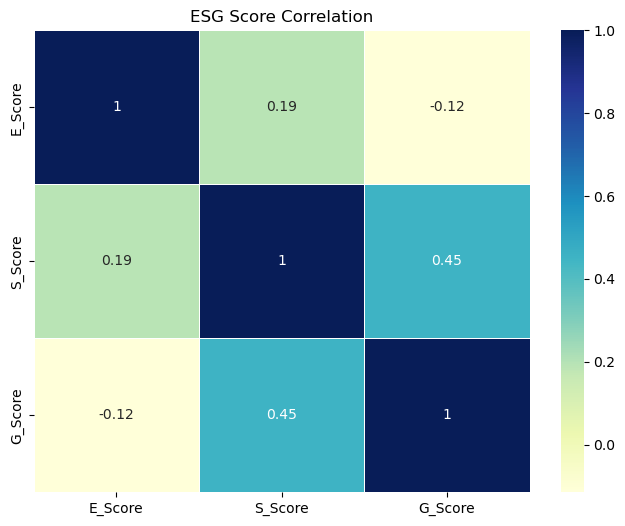

In [55]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(esg_df[['E_Score', 'S_Score', 'G_Score']].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('ESG Score Correlation')
plt.show()

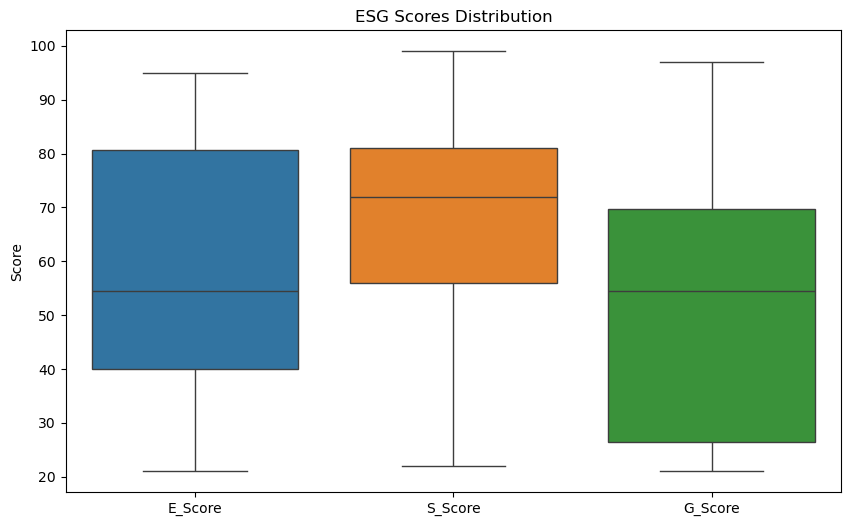

In [57]:
# Boxplot of ESG Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=esg_df[['E_Score', 'S_Score', 'G_Score']])
plt.title('ESG Scores Distribution')
plt.ylabel('Score')
plt.show()

In [59]:
# Average ESG score and rating
esg_df['Average_ESG'] = esg_df[['E_Score', 'S_Score', 'G_Score']].mean(axis=1)

In [61]:
# Rating logic
def get_esg_rating(score):
    if score >= 80:
        return 'AAA'
    elif score >= 70:
        return 'AA'
    elif score >= 60:
        return 'A'
    elif score >= 50:
        return 'BBB'
    elif score >= 40:
        return 'BB'
    elif score >= 30:
        return 'B'
    else:
        return 'CCC'

esg_df['ESG_Rating'] = esg_df['Average_ESG'].apply(get_esg_rating)


In [63]:
esg_df['ESG_Rating'] = esg_df['Average_ESG'].apply(get_esg_rating)

In [65]:
# Print final data with ratings
print('\nFinal ESG Data with Ratings:')
esg_df[['Company', 'E_Score', 'S_Score', 'G_Score', 'Average_ESG', 'ESG_Rating']]



Final ESG Data with Ratings:


,Company,E_Score,S_Score,G_Score,Average_ESG,ESG_Rating
0,Company1,71,77,58,68.666667,A
1,Company2,34,41,37,37.333333,B
2,Company3,91,68,23,60.666667,A
3,Company4,80,78,79,79.000000,AA
4,Company5,40,61,33,44.666667,BB
5,Company6,94,79,28,67.000000,A
6,Company7,94,99,72,88.333333,AAA
7,Company8,43,34,21,32.666667,B
8,Company9,22,81,79,60.666667,A
9,Company10,41,81,90,70.666667,AA


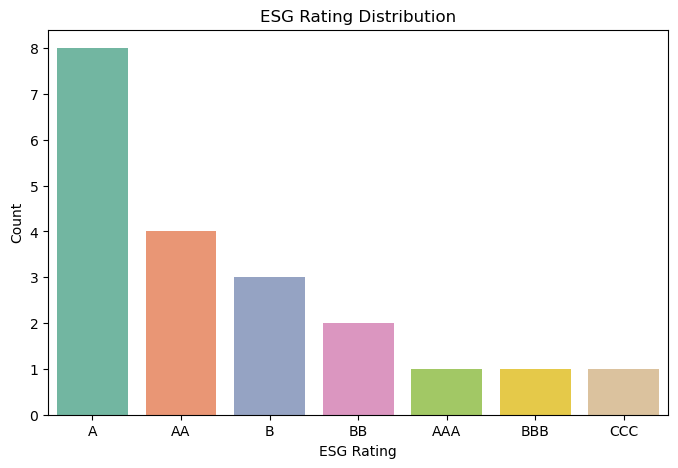

In [67]:
# Count of each ESG Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=esg_df, x='ESG_Rating', order=esg_df['ESG_Rating'].value_counts().index, palette='Set2')
plt.title('ESG Rating Distribution')
plt.xlabel('ESG Rating')
plt.ylabel('Count')
plt.show()